# Vector Chirped Z-transform (VCZT)


In [1]:
from diffractio import degrees, um
from diffractio import np

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY


In [2]:
size = 25 * um
x0 = np.linspace(-size / 2, size / 2, 512)
y0 = np.linspace(-size / 2, size / 2, 256)

focal = 16 * um
wavelength = 0.6328 * um

In [ ]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
    r0=(0 * um, 0 * um),
    w0=(32 * um, 32 * um),
    z0=0 * um,
    A=1,
    theta=0 * degrees,
    phi=0 * degrees,
)


In [4]:
t = Scalar_mask_XY(x0, y0, wavelength)
t.lens_cylindrical(x0=0, focal=focal, angle=90 * degrees)
t.lens(r0=(0.0, 0.0), focal=focal)

In [5]:
u1 = t * u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_polarization(u=u1, v=(1, 1j))
EM1.pupil()

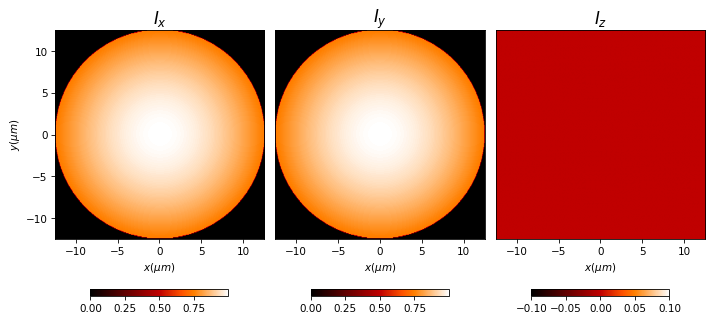

In [6]:
EM1.draw("intensities", logarithm=0)

## to value


In [7]:
x_out = 0.0
y_out = 0.0
z = focal

In [8]:
%%time
EM2_1D=EM1.VCZT(z, x_out, y_out, verbose=True)
print(EM2_1D)


((-2.914244570650705-12.016921496269976j), (12.016921496269976-2.914244570650705j), (-4.39648317751562e-14-7.66053886991358e-15j))
CPU times: user 60.7 ms, sys: 122 ms, total: 183 ms
Wall time: 60.9 ms


## to x_field


In [9]:
size_out = 16 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 512)
y_out = 0.0
z = focal

CPU times: user 99.9 ms, sys: 70.3 ms, total: 170 ms
Wall time: 94.8 ms


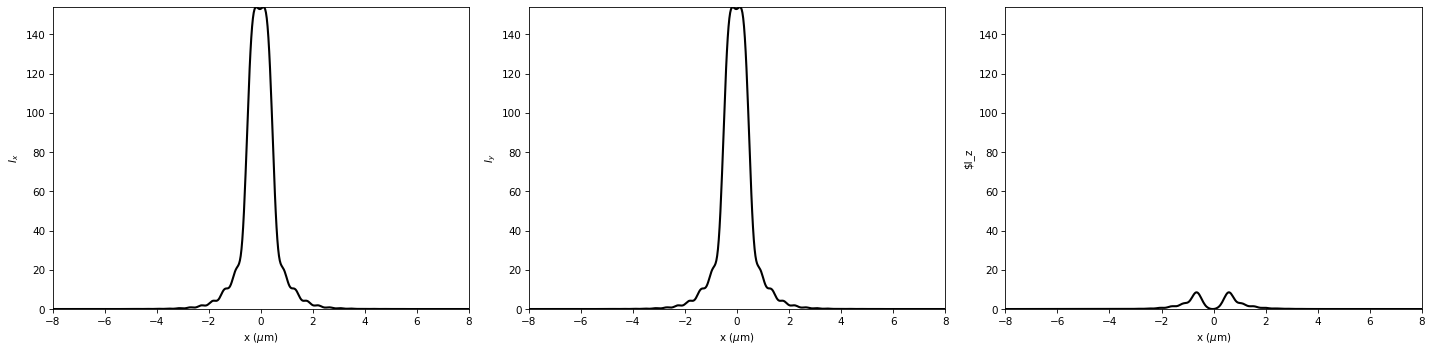

In [10]:
%%time
EM2_1D=EM1.VCZT(z, x_out, y_out)
EM2_1D.draw('intensities');

## to z_field


In [11]:
x_out = 0.0
y_out = 0.0
z = np.linspace(focal - 10 * um, focal + 4 * um, 64)

In [12]:
%%time
EM2=EM1.VCZT(z, x_out, y_out, verbose=False);


CPU times: user 2 s, sys: 752 ms, total: 2.75 s
Wall time: 2.76 s


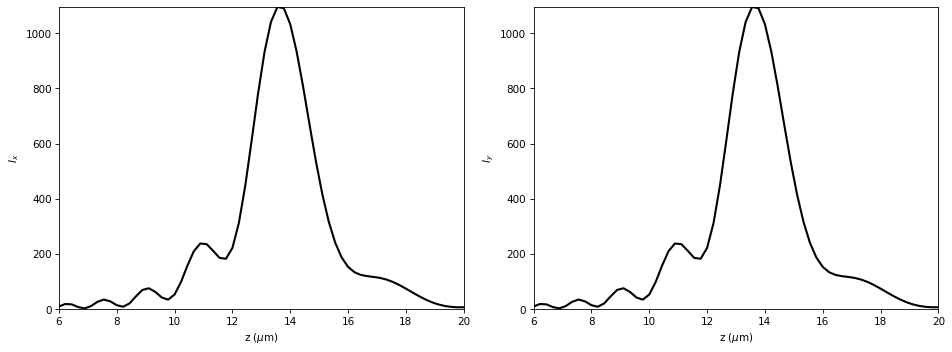

In [13]:
EM2.draw("intensities")

## to XZ_field


In [14]:
size_out = 12 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 128)
y_out = 0.0
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 64)

In [15]:
%%time
EM2=EM1.VCZT(z, x_out, y_out)

CPU times: user 1.57 s, sys: 553 ms, total: 2.13 s
Wall time: 2.06 s


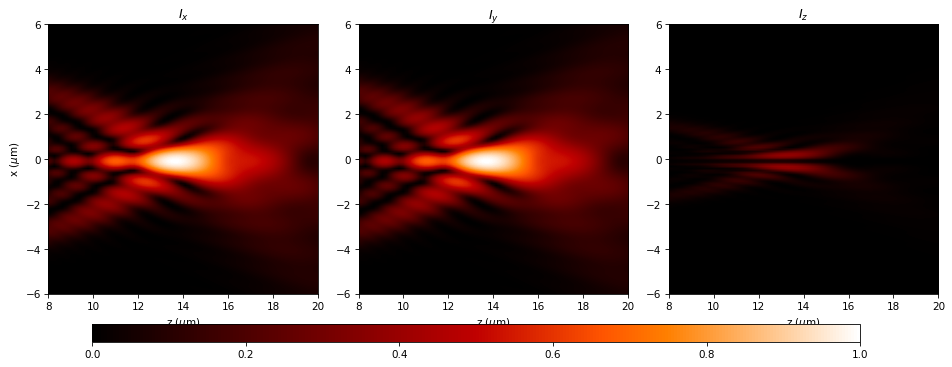

In [16]:
EM2.draw("intensities", logarithm=1e-1)

## to XY_field


In [17]:
size_out = 4 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 512)
y_out = np.linspace(-size_out / 2, size_out / 2, 512)
z = focal - 3 * um

In [18]:
%%time
EM2=EM1.VCZT(z, x_out, y_out)


CPU times: user 84.8 ms, sys: 28 ms, total: 113 ms
Wall time: 113 ms


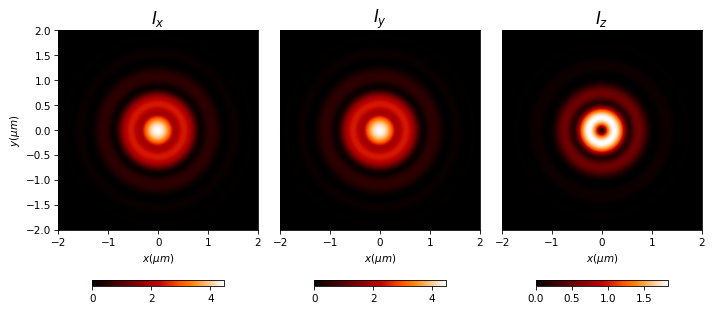

In [19]:
EM2.draw("intensities", logarithm=1e-1)

## to XYZ_field


In [20]:
size_out = 6 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 32)
y_out = np.linspace(-size_out / 2, size_out / 2, 64)
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 16)

In [21]:
%%time
EM3=EM1.VCZT(z, x_out, y_out)

CPU times: user 580 ms, sys: 135 ms, total: 714 ms
Wall time: 673 ms


<Figure size 480x360 with 0 Axes>

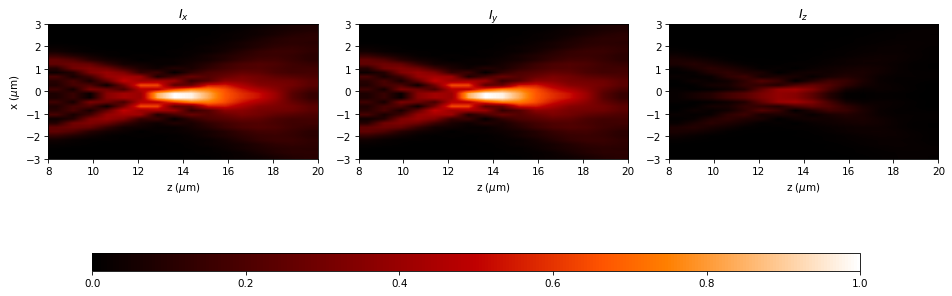

In [22]:
EM3.draw_XZ("intensities", y0=0, logarithm=1e-1)

<Figure size 480x360 with 0 Axes>

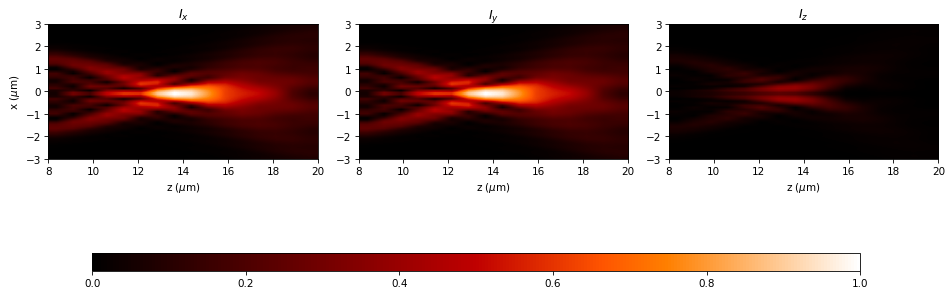

In [23]:
EM3.draw_YZ("intensities", x0=0, logarithm=1e-1)